<font size=6>**ML Intro and Clustering**</font>

<div style="border: 1px solid lightgray; padding: 10px; background-color: #f9f9f9;">

<font size=1>

    Summer School for AstroStatistics in Crete, 2025

The content presented in this notebook is the original work of the authors, unless specified otherwise.
Any publicly available material incorporated is properly credited to its respective sources.
All references to published papers, datasets, and software tools are duly acknowledged.
The original content of this notebook is licensed under the GNU General Public License v3.0 (GNU GPLv3).
</font>
</div>

<hr style="height:0.5px; border:none; color:lightgray; background-color:lightgray;">

In this session we provide a short introduction to **Machine Learning**, and one of its applications, i.e. **Clustering**. <br>
The goals are:

- to get a grasp of what **machine learning** is 
- to show the basic concept of **data exploration** and **interpretation**
- to **use** clustering algorithms in a particular problem.


In [ ]:
from collections import defaultdict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
# Set up a fancy plot style (you can comment it out without consequences)
import sys; sys.path.append('../src'); import plot_style

import warnings
warnings.filterwarnings(action='ignore')

# some handy functions
def add_plot_info():
    """Just add some information for the plot"""
    plt.title('Clusters')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)


# A bit of introduction to ML


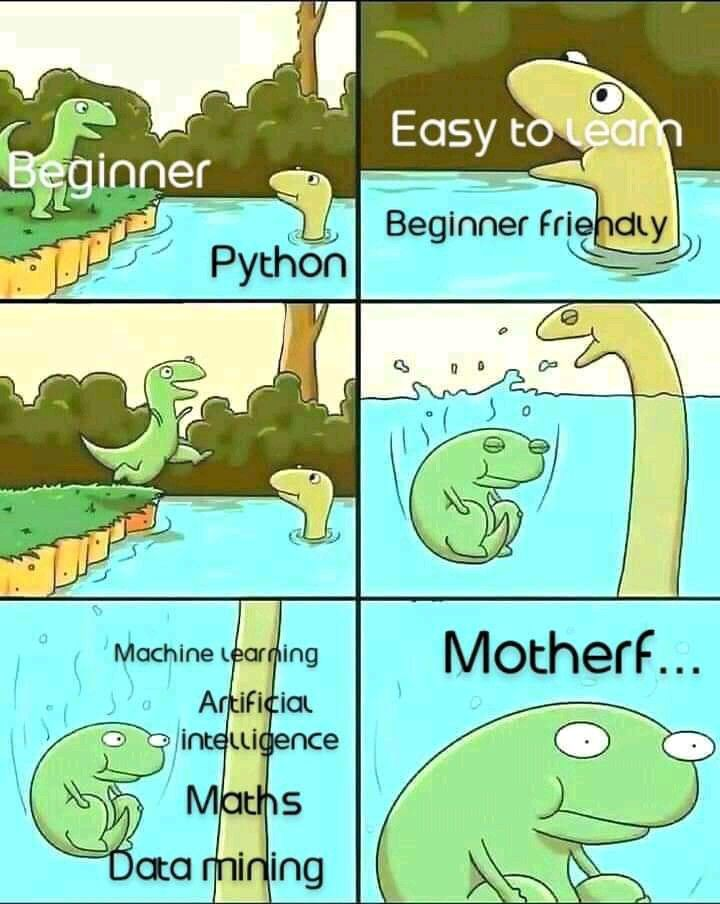

<center> Dive into Python and machine learning! (Source: <a href="https://www.pinterest.ca/pin/549861435766162430/"
 target="_blank" rel="noopener noreferrer"> pinterest random image</a>)</center>
    

## What is machine learning ?

Arthur Samuel (1959): 

>*"Field of study that gives computers the ability to learn without being explicitly programmed."*

## How did we get here? 

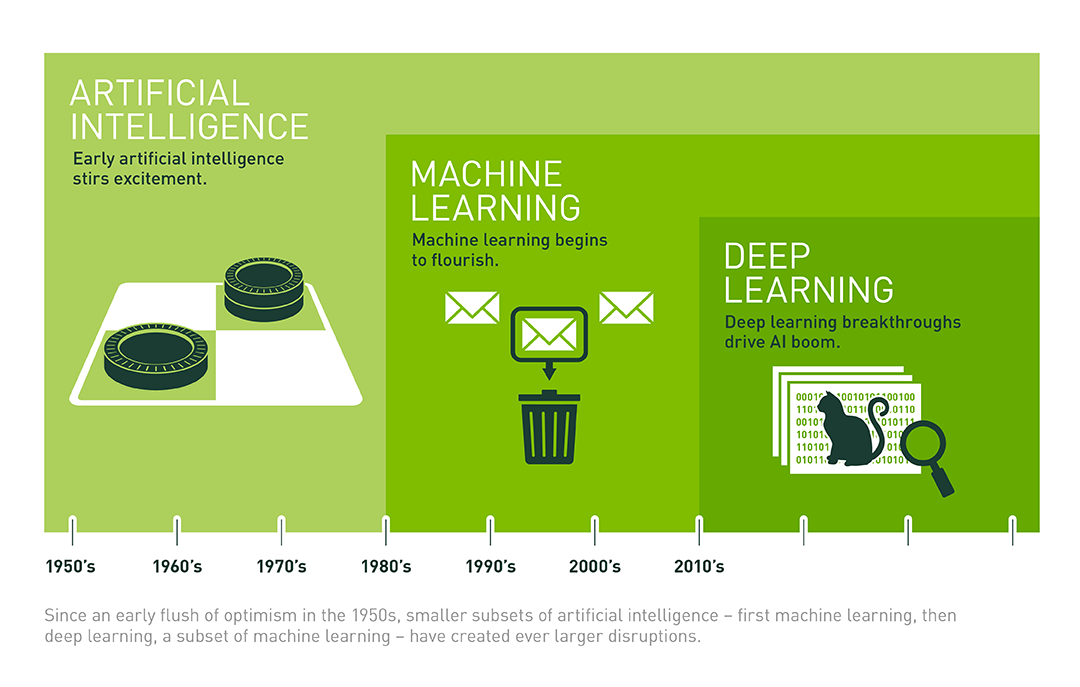<center> Timeline from Artificial Intelligence, to Machine Learning, and Deep learning.<br>
(Credit: <a href="https://blogs.nvidia.com/blog/2016/07/29/whats-difference-artificial-intelligence-machine-learning-deep-learning-ai/" target="_blank" rel="noopener noreferrer"> Nvidia blog - (an interesting read!</a>)</center>
 
## and ... why now? 

- More powerful, abundant, and cheap computation (CPUs/GPUs).
- Growing data sets.
- Advancements in underlying algorithms and implementation.

This is true for both everyday and Astronomy applications !

## ML branches

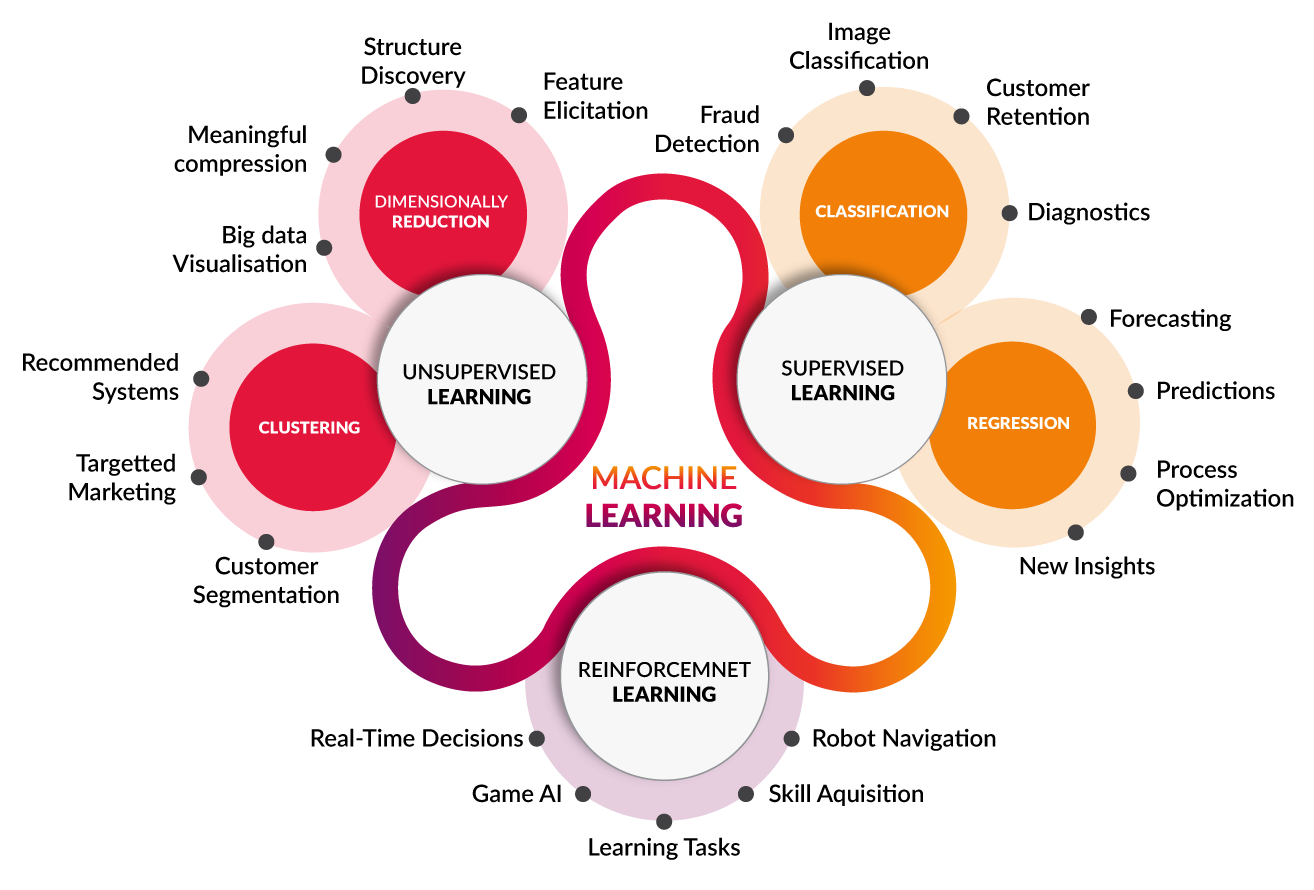
<center>Branches and example applications of Machine Learning<br>
(Credit: <a href="https://www.cognub.com/index.php/cognitive-platform/"
 target="_blank" rel="noopener noreferrer"> CogHub</a>)</center>

- **Supervised**: Labelled data where the algorithms learn to predict the output from the input data.
- **Unsupervised**: Non-labelled data where the algorithms learn to identify structures from the input data.
- **Semi-supervised**: Some labelled data - most is not - and a mixture of supervised and unsupervised techniques can be implemented.

## Unsupervised approaches in particular:

- Clustering: discover groupings or/and structures in the data, i.e. concentrations of datapoints or overdensities (e.g. the locations of galaxies in a BPT diagram)
- Association:  discover the rule(s) describing between variables or features in a dataset (e.g. customer recommendations)
- Dimensionality reduction: tool to reduce the number of input variables or features in a dataset (the more you have the more challenging it becomes to build a predictive model - referred to as *curse of dimensionality*) - also usefulf for visualization purposes.  

## Pros 
+ They can make new discoveries, as often enough we don’t know what they’re looking for in data.
+ They do not require training, which saves (huge) time on producing labels (manual classification tasks such as spectroscopic classification).
+ It reduces the chance of human error and bias, which could occur during manual labeling processes.
+ Unlabeled data is much easier and faster to get.<br>

## Cons
- Output needs careful proper interpretation: 
    - the groups may not match informational classes
    - extra effort has to be made to validate the groups. 
- Less accurate predictive results, as the labels are not part of the process and the method has to learn it by itself. 
- More time is needed to train these algorithms:
    - they need time to analyze and calculate all possibilities
    - the deal with huge datases that may increase computational complexity.


## The most critical take-home points:

- No matter which algorithm you pick, the goal of ML is to make **predictions** and **classifications**.
- There is **no optimal** algorithm, it all depends on your specific problem!<details>
<summary>( Click for an illustration of this point )</summary>
<center><img src="images/my-precious-not.jpg"> 
Figure 3.1. There is not a single algorithm to rule them all !!!<br>
(Credit: <a href="https://knowyourmeme.com/memes/my-precious"
 target="_blank" rel="noopener noreferrer"> knowyourmeme.com</a>)</center>
</details>




# Clustering



    or: "What can data tell us ?"

## Selecting a tool - the K-means algorithm

The K-means algorithm tries to partition a sample of N observations (with each observation being a $d$-dimensional vector) into $k$ individual clusters $C_k$. 

We first need to find a metric, i.e. to define the **loss function**, which (in this case) is the within-cluster sum-of-squares of the observations:

$$ Loss = \sum_{k=1}^{K} \sum_{i \epsilon C_k} ||x_i-\mu_k||^2$$,

where $\mu_k=\frac{1}{N_k}\sum_{i \epsilon C_k} x_i$ is the mean/centroid of the $N_k$ points included in each of the $C_k$ clusters. 

The solution comes from **minimizing** the above function, i.e.: 

$$ min (Loss) = \min_{\mu_k} \left (  \sum_{k=1}^{K} \sum_{i \epsilon C_k} ||x_i-\mu_k||^2 \right )$$. 

**Steps**:
1. Initiate algorithm by selecting $k$ means <br>
    *e.g. select randomly $k$ observations as initial means - see also [Wiki:K-means initialization](http://en.wikipedia.org/wiki/K-means_clustering#Initialization_methods)*
2. Assign each observation to the nearest cluster
3. Calculate the new mean value for each cluster $C_k$ according to the new observations assiged
4. Repeat steps 2 and 3 up to the point that there are no updates in the assigments to the clusters.

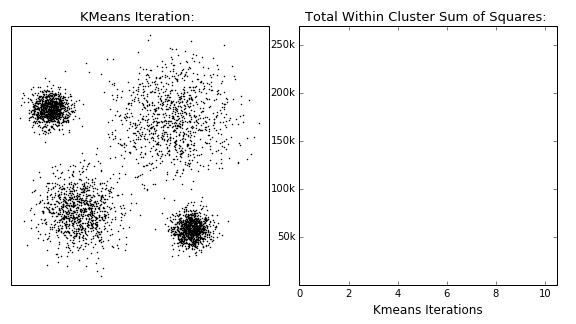
<center> Evolution of K-means centroids through iterations. <br>
(Credit: <a href="https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/"  target="_blank" rel="noopener noreferrer">Clustering with Scikit with GIFs, by David Sheehan</a>)</center>


A globally optimal minimum is not guaranteed (might converge to a local minimum). This is highly dependent on the initialization of the centroids. This is why, in practice, K-means is run multiple times with different starting values selecting the result with the lowest sum-of-squares error. To improve on that we can initially select centroids that are generally distant from each other (sklearn implementation by using `init='k-means++'` parameter). For more see [Grouping data points with k-means clustering, by Jeremy Jordan](https://www.jeremyjordan.me/grouping-data-points-with-k-means-clustering/).

**Complexity**

$O(knT)$, where k, n and T are the number of clusters, samples and iterations, respectively.

**Pros**

- Simple and intuitive

**Cons**

- The number of clusters (K) must be provided (or cross-validated)
- There is an inherit assumption of isotropic clusters (i.e. not well fitted for elongated clusters, or manifolds with irregular shapes)
- Inertia is not a normalized metric: lower values are better , but as the dimensions increase so does the inertia

**An alternative for faster implementation - Mini Batch K-means**

For faster computations the sklearn offers the [Mini Batch K-means](http://scikit-learn.org/stable/modules/clustering.html#mini-batch-kmeans) method which simply breaks the initial set of observations/data points to smaller randomly selected subsamples.

For each subsample in the mini batch the assigned centroid is updated by taking into account the average of that subsample and all previous subsamples assigned to that centroid. This is repeated until the predefined number of iterations is reached. Its results are generally only slightly worse then the standard algorithm.

### Example use of K-means

In the following example we artificially create two groups of data and we use the K-means algorithm.

**Creating some data**

In [ ]:
# Set random seed for reproducibility
np.random.seed(2025)

# select number of samples/points per cluster
num_samples = 50

# Generate cluster 1 with normal distribution
cluster1_mean = [3, 3]
cluster1_cov = [[2, 0], [0, 2]]
cluster1_samples = np.random.multivariate_normal(cluster1_mean, 
                                                 cluster1_cov, 
                                                 num_samples)

# Generate cluster 2 with normal distribution
cluster2_mean = [8, 8]
cluster2_cov = [[2, 0], [ 0, 2]]
cluster2_samples = np.random.multivariate_normal(cluster2_mean, cluster2_cov, num_samples)

plt.plot(cluster1_samples[:,0],cluster1_samples[:,1], 
         'o', color='tab:blue', label='Cluster 1')

plt.plot(cluster2_samples[:,0],cluster2_samples[:,1], 
         'o', color='tab:orange', label='Cluster 2')

add_plot_info()    



The above plot is the result of the mock data creation. In reality what we would see is the following plot (i.e. only the data without any idea of the original group).

In [ ]:
X = np.concatenate((cluster1_samples,cluster2_samples))

plt.plot(X[:,0], X[:,1] , '.k', ms=10) 

add_plot_info()


**Implementation**

Throughout the machine-learning part we will be using the [scikit-learn](https://scikit-learn.org/stable/index.html) module developed on top of `NumPy`, `SciPy`, and `matplotlib`, offering efficient tools on machine-learning applications, data mining, and data analysis. 

We will use [`sklearn.cluster.KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), for which the most important (currently) option is the number of groups (we **guess**). A valid option is of course 2.

In [ ]:
from sklearn.cluster import KMeans

# number of clusters
Clusters_kmeans = 2

# preparing the model with this number of clusters
kmeans_model = KMeans(n_clusters=Clusters_kmeans)
# fitting the model to the data
kmeans_model.fit( X )

**Check** how we apply the algorithm:

1. Selecting the parameters (e.g. number of clusters)
2. Run the algorithm using the `.fit()` method (model learns from data)

In [ ]:
# returning the cluster identified
print("Cluster centers:")
print(kmeans_model.cluster_centers_)

# comparing with the real ones
print()
print("Real centers:")
print(cluster1_mean, cluster2_mean)

The algorithm returns the class assigned to each data point:

In [ ]:
print(kmeans_model.labels_)

In [ ]:
# coordinates of the clusters for plotting
cc_x = kmeans_model.cluster_centers_[:,0]
cc_y = kmeans_model.cluster_centers_[:,1]

# plotting the centers
plt.plot(cc_x, cc_y, 'k+', ms=100)

# plotting the datapoints color-coded according 
# to the cluster they have been assigned to
new_map = matplotlib.cm.gray.from_list('clustering', ('blue', 'red'), N=Clusters_kmeans)
scat2 = plt.scatter( X[:,0], X[:,1], c=kmeans_model.labels_, edgecolors='face', cmap=new_map)
cb = plt.colorbar(scat2, ticks=range(0,Clusters_kmeans+1,1))   # number of clusters
cb.set_ticklabels(range(1,Clusters_kmeans+2,1))
cb.set_label('Cluster Label')

add_plot_info()

plt.show()

<div class="alert alert-warning" role="alert" style="border-radius: 8px; padding: 10px">
  
<font size=4>**Exercise 1:**</font>    

**Objective:** Play around with the number of clusters as an input to K-means and explore the effect.

**Taks:** Use the following function (cluster_generator) to create some clusters. It does it automatically for you so that *you do not know how many clusters it creates* (well... you can find out but you **shouldn't**!). It returns an array of positions for all samples from all clusters. 

- Plot the samples and guess the number of clusters. 

- Put this into K-means and run the algorithm. 

- Discuss with your partner what you notice. You can run it a few times.

</div>

In [ ]:
def cluster_generator(num_clusters=2, num_samples=50, verbose=False):
    """ A function to automatically generate some clusters
    randomly. It returns one single datasets (points with 
    x and y) and the cluster centers. 
    
    num_samples: 50 , numper of points per cluster
    verbose: False , not printing any information on 
    the clusters.    
    """
    # automatically create a number of clusters in this range
    num_clusters = np.random.randint(3, 7)

    # select number of samples/points per cluster
    num_cluster_samples = num_samples

    # Generate clusters with normal distribution
    center_clusters = []    
    data_clusters = []
    for c in range(num_clusters):        
        cluster_mean = [np.random.randint(-10, 15), np.random.randint(-10, 15)]
#        print(cluster_mean)
        cluster_cov = [[np.random.randint(1,3), 0], [0, np.random.randint(1,3)]]
#        print(cluster_cov)
        cluster_samples = np.random.multivariate_normal(cluster_mean, 
                                                         cluster_cov, 
                                                         num_cluster_samples)
        data_clusters.append(cluster_samples)
        center_clusters.append(cluster_mean)    

        if verbose==True:
            print(cluster_mean)
            plt.scatter(cluster_samples[:,0],cluster_samples[:,1], label=f'Cluster {c}')
            
    
    data_clusters = np.concatenate(data_clusters, axis=0)
#    print(center_clusters)
    return data_clusters, center_clusters


# Generating and visualizing data
X, Xc = cluster_generator()

plt.plot(X[:,0], X[:,1] , '.k', ms=10) 
add_plot_info()

In [ ]:
from sklearn.cluster import KMeans


# number of clusters -GUESS !
Clusters_kmeans = ...

# preparing the model with this number of clusters
kmeans_model = KMeans(n_clusters=Clusters_kmeans)
# fitting the model to the data
kmeans_model.fit( X )

# returning the cluster identified
print(f"Cluster centers from K-means ({len(kmeans_model.cluster_centers_)} found):")
print(kmeans_model.cluster_centers_)

# comparing with the real ones
print()
print(f"Real centers ({len(Xc)} clusters):")
for c in Xc:
    print(c)
    plt.plot(c[0],c[1], 'x', c='tab:green', ms=80)

# coordinates of the clusters for plotting
cc_x = kmeans_model.cluster_centers_[:,0]
cc_y = kmeans_model.cluster_centers_[:,1]

# plotting the centers
plt.plot(cc_x, cc_y, 'k+', ms=100)

# plotting the datapoints color-coded according 
# to the cluster they have been assigned to
new_map = matplotlib.cm.gray.from_list('colorbar', ('blue', 'red'), N=Clusters_kmeans)
scat2 = plt.scatter( X[:,0], X[:,1], c=kmeans_model.labels_, edgecolors='face', cmap=new_map)
cb = plt.colorbar(scat2, ticks=range(0,Clusters_kmeans+1,1))   # number of clusters
cb.set_ticklabels(range(1,Clusters_kmeans+2,1))
cb.set_label('Cluster Label')

add_plot_info()

plt.show()

<div class="alert alert-warning" role="alert" style="border-radius: 8px; padding: 10px">

**Question**:   
How does the algorithm performs with respect to your guess ? <br>How dependant is on the number of clusters?<br>    
    
<details>

<b><summary>[discuss with your partner before clicking here!]</summary></b>  

The number of clusters definnes precisely what the algorithm will find. 
    
And, if clusters are ovelapping then it is  more difficult for the algorithm to detect them. 
   

</details>
</div>

### How to find the best k value? - the "elbow" approach

K-means needs a certain number of clusters to run. Therefore, our selection affects our interpretation (and any potential discoveries!). So, how can we improve (automatically) the selection of clusters that the K-means algorithm will search for?

One answer can be given through the "elbow method". This method is based on the following process:

1. Running the algorithm for a range of different clusters k (from 1 up to a maximum number).

2. Calculating the 'inertia' for each k choice. 

3. Plotting the above quantity as a function of k:

4. Identifying the 'elbow' point in the plot, i.e., the point on the graph where the rate of decrease significantly slows down. This indicates that adding more clusters beyond this point does not substantially reduce inertia, and thus, we do not gain much.

5. The k value corresponding to this point is considered the optimal choice.

<div class="alert alert-info" role="alert" style="border-radius: 8px; padding: 10px;">

&#9755; This method does not always provide a clear answer, especially if the dataset does not exhibit well-defined clusters or if they have different sizes and densities. 

</div>

_Note: we are using the latest X dataset (from the previous set). You may see different results from others!_

In [ ]:
from sklearn import metrics

inert = []
xclusters = range(2,14)
for i in xclusters:
    print(f'-- working with {i} clusters...')
    kmeans_model = KMeans(n_clusters=i, random_state=0, n_init='auto')
    kmeans_model.fit(X)
    inert.append(kmeans_model.inertia_)

In [ ]:
plt.plot( xclusters, inert)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (loss) ')
plt.show()

Let's plug in the number of clusters corresponding to the "elbow" found:

In [ ]:
from sklearn.cluster import KMeans


# number of clusters -GUESS !
Clusters_kmeans = 4

# preparing the model with this number of clusters
kmeans_model = KMeans(n_clusters=Clusters_kmeans)
# fitting the model to the data
kmeans_model.fit( X )

# returning the cluster identified
print(f"Cluster centers from K-means ({len(kmeans_model.cluster_centers_)} found):")
print(kmeans_model.cluster_centers_)

# comparing with the real ones
print()
print(f"Real centers ({len(Xc)} clusters):")
for c in Xc:
    print(c)
    plt.plot(c[0],c[1], 'x', c='tab:green', ms=80)

# coordinates of the clusters for plotting
cc_x = kmeans_model.cluster_centers_[:,0]
cc_y = kmeans_model.cluster_centers_[:,1]

# plotting the centers
plt.plot(cc_x, cc_y, 'k+', ms=100)

# plotting the datapoints color-coded according 
# to the cluster they have been assigned to
new_map = matplotlib.cm.gray.from_list('colorbar', ('blue', 'red'), N=Clusters_kmeans)
scat2 = plt.scatter( X[:,0], X[:,1], c=kmeans_model.labels_, edgecolors='face', cmap=new_map)
cb = plt.colorbar(scat2, ticks=range(0,Clusters_kmeans+1,1))   # number of clusters
cb.set_ticklabels(range(1,Clusters_kmeans+2,1))
cb.set_label('Cluster Label')

add_plot_info()

plt.show()

### Other metrics to automate the cluster number

Now, given that we do not know anything apriori for the numbers of clusters, there are some metrics that can used to determine the performance in each case. 

#### Silhouette Score

Using the distances between the points in the same cluster and theirs with all other points in the next nearer cluster:

$$ s = \frac{b - a}{max(a,b)} $$ 

where a corresponds to the mean distance between a sample and all other samples _within the same cluster_, while b is the mean distance of a sample (in the examined cluster) with all other points in the _next nearest cluster_. 

&#10509; A **higher** value indicates better performance (-1...1).

#### Calinski-Harabasz Index

Similar to the silhouette score, but using the ratio of the sum of dispersion of the samples within each cluster and the dispersion of the clusters in total. For a set of data $E$ of size $n_E$ which has been clustered into $k$ clusters, it is defined as:

$$ s = \frac{tr(B_k)}{tr(W_k)} \times \frac{n_E-k}{k-1} $$

where $tr(B_k)$ is the trace of the between group dispersion matrix, and $tr(W_k)$ the trace of the within-cluster dispersion matrix, defined as:

$$ W_k = \sum_{q=1}^{K} \sum_{x \in C_q} (x - c_q)(x - c_q)^T \\
 B_k = \sum_{q=1}^{k} n_q(c_q-c_E)(c_q-c_E)^T $$
 
with $C_q$ the set of points in cluster $q$, $c_q$ the center of cluster $q$, $c_E$ the center of $E$, and $n_q$ the number of points in cluster $q$.  

&#10509; A **higher** value indicates better performance (denser and well separated clusters). 

#### Davies-Bouldin Index

It is an index that calculates the 'similarity' between clusters, and actually measures how the distance between clusters compares with the sizes of the clusters themselves.  

$$ DB = \frac{1}{k} \sum_{i=1}^{k} \max_{i \neq j} R_{ij} $$

where $R_{ij} = \frac{s_i+s_j}{d_{ij}}$ corresponds to the similarity measurement, $s_i$ is the average distance between each point of cluster $i$ and the centroid of that cluster (diameter), and $d_{ij}$ is the distance between cluster centroids $i$ and $j$. The form chosen for $R_{ij}$ is a nonnegative and symmetric. 

&#10509; A **lower** value (closer to 0) indicate better performance.

<div class="alert alert-info" role="alert" style="border-radius: 8px; padding: 10px;">

&#9755; You can (should!) check [sklearn's clustering metrics page](https://scikit-learn.org/stable/modules/clustering.html) for more details regarding the drawbacks and advantages of each metric.

</div>

Let's see them in action!


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Define range of cluster numbers to test
k_values = range(2, 10)

# Initialize lists to store scores
inertia = []
silhouette = []
calinski = []
davies = []

# Fit KMeans and compute metrics for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X)

    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X, labels))
    calinski.append(calinski_harabasz_score(X, labels))
    davies.append(davies_bouldin_score(X, labels))

# Plot all metrics for visual comparison
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].plot(k_values, inertia, 'bo-')
axs[0, 0].set_title('Elbow Method (Inertia)')
axs[0, 0].set_xlabel('k')
axs[0, 0].set_ylabel('Inertia')

axs[0, 1].plot(k_values, silhouette, 'go-')
axs[0, 1].set_title('Silhouette Score')
axs[0, 1].set_xlabel('k')
axs[0, 1].set_ylabel('Score')

axs[1, 0].plot(k_values, calinski, 'ro-')
axs[1, 0].set_title('Calinski-Harabasz Index')
axs[1, 0].set_xlabel('k')
axs[1, 0].set_ylabel('Score')

axs[1, 1].plot(k_values, davies, 'mo-')
axs[1, 1].set_title('Davies-Bouldin Index')
axs[1, 1].set_xlabel('k')
axs[1, 1].set_ylabel('Score (lower is better)')

plt.tight_layout()
plt.show()


So different metrics give slightly different result, but proper interpretation and combination of the results can lead to more accurate conclusions. 

## Selecting a tool - the DBSCAN algorithm

The DBSCAN (Density Based Spatial Clustering of Applications with Noise) algorithm views clusters as areas of high density separated by areas of low density. Thus, clusters found by DBSCAN can be of any shape - as opposed to other algorithms (K-means for example) which assume that clusters are convex shaped.

It uses 2 parameters:
* $eps$ : neighborhood size
* $minPts$ : minimum number of points for a neighborhood to be considered dense

With a **sinlge scan** we can label the points as: core, border, noise. How?

-  A point $p$ is defined **core** if at least $minPts$ points are within the area defined by $eps$ (including itself).
-  A **border** point is a non-core point that has at least one core point in its neighborhood
-  A **noise** point is neither a core nor a border point. There represent outliers in the data set


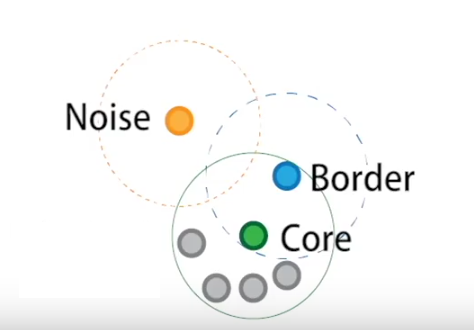

<center>Definition of core, border, and noise points, according to DBSCAN,<br>
(Credit: <a href="https://arogozhnikov.github.io/2017/07/10/opera-clustering.html"  target="_blank" rel="noopener noreferrer">Clustering applied to showers in the OPERA, by Alex Rogozhnikov</a>)    
</center>

Having defined these points, DBSCAN operates as follows:

**Steps:**

1. The algorithm selects a core point that has not been explored.

2. It finds the points that are within an `eps` distance from this point and examines them.

3. If these points are also core points, it examines their `eps`-neighborhood, expanding the cluster.

4. The above process is applied recursively to all points (core points and border points), further expanding the cluster it is examining until all points it has visited are exhausted.

5. When these points are exhausted, it selects the next unvisited core point (in another cluster) and continues the previous process.

6. The process ends when all points have been assigned to a cluster or identified as noise.


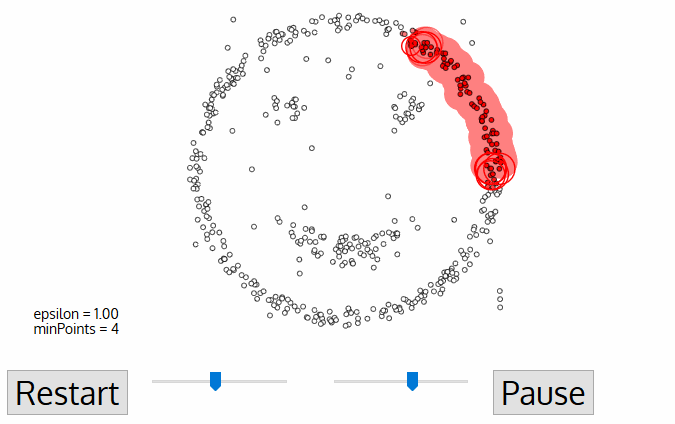

<center>An example of how it constructs clusters (right).<br>
(Credit: <a href="https://arogozhnikov.github.io/2017/07/10/opera-clustering.html"  target="_blank" rel="noopener noreferrer">Clustering applied to showers in the OPERA, by Alex Rogozhnikov</a>)    
</center>

**Complexity**

$O(n^2)$, where n is the number of points. 

**Pros**
- Any number of clusters
- Clusters of varying size and shape
- Finds and ignores outliers

**Cons**
- Relatively slow
- Extremely sensitive to parameters choice
- In rare cases, border points move to an other cluster when DBSCAN is re-run
- Serious troubles with clusters with varying density<br>
  *(OPTICS and HDBSCAN are variations which address this problem)*

### Example use of DBSCAN

In the following example we artificially create two groups of data and we use the DBSAN algorithm.

**Creating some data**

In [ ]:
# import this to create some fancy data
from sklearn.datasets import make_moons

# Generate synthetic data (moons dataset)
Xd, y = make_moons(n_samples=200, noise=0.1, random_state=2025)

num_classes = len(set(y))
new_map = matplotlib.cm.gray.from_list('clastering', ('blue', 'red'), N=num_classes)
scat2 = plt.scatter( Xd[:,0], Xd[:,1], c=y, 
                    edgecolors='face', cmap=new_map)
cb = plt.colorbar(scat2, ticks=range(1,num_classes+2,1))   # number of clusters
cb.set_ticklabels(range(1,num_classes+2,1))
cb.set_label('Cluster Label')

add_plot_info()    



What we should see if we combine into one dataset.

In [ ]:
plt.plot(Xd[:,0], Xd[:,1], 'ok') 

add_plot_info()    


**Implementation**

We will use [`sklearn.cluster.DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN). The most important parameters of course are `eps` and `min_samples`.

In [ ]:
from sklearn.cluster import DBSCAN

# define the model first
dbscan = DBSCAN(eps=0.08, min_samples=3)
# fit the data
dbscan.fit(Xd)

**Check** the all algorithms are applied using the same methods!

Let's see the number of classes returned by the algorithm:

In [ ]:
print(set(dbscan.labels_))

Let's visualize the predictions now.


In [ ]:
num_classes = len(set(dbscan.labels_))
new_map = matplotlib.cm.gray.from_list('clustering', ('blue', 'red'), N=num_classes)
scat2 = plt.scatter( Xd[:,0], Xd[:,1], c=dbscan.labels_, 
                    edgecolors='face', cmap=new_map)
cb = plt.colorbar(scat2, ticks=range(-1,num_classes,1))   # number of clusters
cb.set_ticklabels(range(-1,num_classes,1))
cb.set_label('Cluster Label')

add_plot_info()    

Well...this is kind of embarrassing ! DBSCAN should work, what's the problem? 

<div class="alert alert-warning" role="alert" style="border-radius: 8px; padding: 10px">

**Question**: Which are the optimal parameters?<br>    
In order to identify the two clusters play around with the `eps` and `mins_sample`. 

_HINT: suggested ranges 0.05 -- 0.30, 2 -- 7, respectively_


_NOTE: the group of points with -1 indicate noise._<br>
    
<details>

<b><summary>[Click here for a possible good pair...]</summary></b>  
eps=0.22 <br>
mins_sample=5
    

</details>
</div>

## Can we automated the search? 

The previous exercise demonstrated that it's not easy, and perhaps not even obvious, what the optimal parameters are. Indeed, there is a variety of approaches (see for example these articles [statexchange/88872](https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan), [stackoverflow/15050389](https://stackoverflow.com/questions/15050389/estimating-choosing-optimal-hyperparameters-for-dbscan), και ['A practical guide to DBSCAN method, by Amit Shreiber](https://towardsdatascience.com/a-practical-guide-to-dbscan-method-d4ec5ab2bc99)). We need to properly define two parameters.

 - We can identify a similar "elbow" point, by investigating the (sorted) distances for all pointe as a function of the number of points. That can help estimate the `eps` parameter.

 - Regarding the `minPts` we need to apply domain knowledge (i.e. information from the specific problem). However, a general rule is: 2 times the number of dimensions minus 1 ([Sander et al., 1998](https://link.springer.com/article/10.1023/A:1009745219419).

Given that second choice, the determination of `eps` becomes a bit easier: once minPts is fixed, we can explore different values for eps. Still, we need a metric that can quantify the performance of the algorithm. We can apply the metrics we used previously but we need to udnerstand the their limitations There are several available (see, for example, sklearn - clustering metrics).
στο [sklearn - clustering metrics](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics)). 

So, let's see how can we search for the optimal `eps`. What we are going to do it to search for a range of `eps` values and make a plot of the number of identified clusters per value. We will then visualize some indicative `eps` values to check the best results. For the optimal number of `minPts` we will follow the rule above, which, given the 2 dimensions of our problem (x,y), results in `minPts` $= 2 \times 2 -1 = 3 $.

In [ ]:
# number of clusters / groups
n_clusters = []
# search range for eps
eps_range = np.arange(0.001, 0.5, 0.01)

# run DBSCAN for each value, and get the number of clusters
for e in eps_range:
    dbscan = DBSCAN(eps=e, min_samples=3)
    dbscan.fit(Xd)
    clstrs = len(set(dbscan.labels_))
    print(e, ":", clstrs)
    n_clusters.append(clstrs)
    
# plotting the results    
plt.plot(eps_range, n_clusters, '*--', c='orange' ) 
plt.xlabel('eps')
plt.ylabel('number of clusters')

Let's try some of these values to visualize the results. We will use the following helpful plotting function. 

In [ ]:
def run_n_show(eps_run, ax):
    """A quick funtion to run the DBSCAN with a specific
    eps value, and visualize the result to check.
    ax refers to the subplot id for the plot. """

    # run the algorithm
    dbscan_run = DBSCAN(eps=eps_run, min_samples=3)
    dbscan_run.fit(Xd)

    # visualize the predictions
    num_classes = len(set(dbscan_run.labels_))
    new_map = matplotlib.cm.gray.from_list('clustering', ('blue', 'red'), N=num_classes)
    ax.scatter( Xd[:,0], Xd[:,1], c=dbscan_run.labels_, 
                        edgecolors='face', cmap=new_map)
    ax.set_title(f"run for eps={eps_run}")

    
fig, ( (ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, 
                            sharey=True, sharex=True,
                            figsize=(10,10))

run_n_show(0.04, ax1)
ax1.set_ylabel('Y')

run_n_show(0.1, ax2)
ax2.set_xlabel('X')

run_n_show(0.15, ax3)
ax3.set_ylabel('Y')

run_n_show(0.23, ax4)
ax4.set_xlabel('X')

plt.tight_layout()
plt.show()

plt.show()

## Comparing the two algorithms

Let's now check if K-means is able to recover the clusters. It is kind of obvious what should be the number of clusters... 

In [ ]:
# number of clusters
Clusters_kmeans = 2

# preparing the model with this number of clusters
kmeans_model = KMeans(n_clusters=Clusters_kmeans)
# fitting the model to the data
kmeans_model.fit( Xd )

# coordinates of the clusters for plotting
cc_x = kmeans_model.cluster_centers_[:,0]
cc_y = kmeans_model.cluster_centers_[:,1]

# plotting the centers
plt.plot(cc_x, cc_y, 'k+', ms=100)

# plotting the datapoints color-coded according 
# to the cluster they have been assigned to
new_map = matplotlib.cm.gray.from_list('whatever', ('blue', 'red'), N=Clusters_kmeans)
scat2 = plt.scatter( Xd[:,0], Xd[:,1], c=kmeans_model.labels_, edgecolors='face', cmap=new_map)
cb = plt.colorbar(scat2, ticks=range(0,Clusters_kmeans+1,1))   # number of clusters
cb.set_ticklabels(range(1,Clusters_kmeans+2,1))
cb.set_label('Cluster Label')

add_plot_info()

plt.show()

<div class="alert alert-warning" role="alert" style="border-radius: 8px; padding: 10px">

**Question**: What would you comment regarding the performance of K-means instead of DBSCAN?
    
<details>

<b><summary>[Think a bit before clicking here...]</summary></b>  
Obviously, K-means algorithm is able to find two clusters. However, it fails to properly identify the two cluasters as these are not isotropic (a basic assumption for K-means).

</details>
</div>

# Application

The following dataset originates from measurements of two spectral lines for a sample of stars. The strength of a spectral line can be measured by its equivalent width (EQW).  

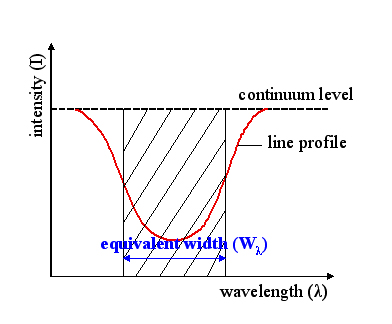
<center> Defining EQW: the width of a line with intensity equal to the local continuum and total flux equal to that of the line.   <br>
(Credit: <a href="https://en.wikipedia.org/wiki/Equivalent_width" 
 target="_blank" rel="noopener noreferrer">Wikipedia: Equivalent Width, by Szdori </a>)
    </center>

Therefore, the larger the EQW the stronger the line is. The presence of spectral lines depends on the temperature of the stellar sources. Because of this, we see a developmet of different spectral lines as we move from the hottest to the cooler stars. This corresponds to moving from earlier spectral types (O-type stars; 50-25kK) to later ones (M-type; 3.5-2.5kK) [see the Morgan-Keenan spectral classification scheme](https://en.wikipedia.org/wiki/Stellar_classification)].

<div class="alert alert-warning" role="alert" style="border-radius: 8px; padding: 10px">
  
<font size=4>**Exercise 2:**</font>    

**Objective:** Identify the clusters of spectral types for hot massive stars based on the ratio of spectral lines.

**Taks:** To do this follow the automated approach for K-means. In particular:
    
- Run the automated estimate of the identified clusters we run previously for K-means.

- Check all metrics and decide which one to use. 
    
- Run the K-means algorithm with the selected number of clusters and visualize the result.
    
- Think over your results (whay could they mean?) and cross-check with the real data. 

</div>

In [ ]:
def flospecConv(arg):
    """
    Function to convert from spectral types to 
    float numbers (e.g. B0,O9.5 to 20.0,19.5)
    and backwards.
    """ 
    try:
        float(arg)
        if str(arg)[0]=='1':
            sp = 'O'
        elif str(arg)[0]=='2':
            sp = 'B'
        elif str(arg)[0]=='3':
            sp = 'A'
        else:
            sys.exit(' ! ERROR: more than O/B stars! Adjust conversion function.')
        new_arg = sp+str(arg)[1:]
    except ValueError:
        if arg[0]=='O' or arg[0]=='o':
            fl = '1'
        elif arg[0]=='B' or arg[0]=='b':
            fl = '2'
        elif arg[0]=='A' or arg[0]=='a':
            fl = '3'
        else:
            sys.exit(' ! ERROR: Check input! If more than O/B stars adjust conversion function.')
        new_arg = float(arg.replace(arg[0],fl))

    return new_arg


In [ ]:
# Reading the data file and selecting lines
# when selecting lines do it in pairs, and with shorter line first

PATH_data = "data/stellar_types.dat"

sellines = ['HeII/4200', 'HeI/4471'] # in order of wavelength
#sellines = ['HeI/4471', 'MgII/4481'] # in order of wavelength

stars=defaultdict(list)
with open(PATH_data,'r') as inf:
    for line in inf:
        cols = line.split()
        objt = cols[0]
        spln = cols[1]
        if spln in sellines: 
#            print(splin)
            eqw = cols[2]
            stars[objt].append(eqw)             # the shorter line is appended first!
            
#print(stars)

# Creating data structures:

sptype, flosptype, eqwA, eqwB = [], [], [], []
for s in stars.keys():
    sptype.append(s.split('-')[0])
    flosptype.append(flospecConv(s.split('-')[0]))
    eqwA.append(float(stars[s][0]))                 # A is the shorter line
    eqwB.append(float(stars[s][1]))                 # B is the other line (obviously!)
    
# > Organizing data in an analysis-ready fashion:
X = np.column_stack((eqwA,eqwB))

print('Sample shape:')
print("___________________________________")
print('  X  | ' + str(X.shape))
print('     | ' + str(X.shape[0]) + ' samples x ' + str(X.shape[1]) + ' diagnostics' )

In [ ]:
# Visualize data

scat = plt.scatter(eqwA, eqwB, c='k')

# automatic labelling from the lines 
plt.xlabel(r""+f"EQW of { sellines[0].split('/')[0]} $\lambda${sellines[0].split('/')[1]}")
plt.ylabel(r""+f"EQW of { sellines[1].split('/')[0]} $\lambda${sellines[1].split('/')[1]}")

# simpler approach
# plt.xlabel(r"EQW of line HeII $\lambda$4200 ")
# plt.ylabel(r"EQW of line HeI $\lambda$4471 ")

plt.show()

In [ ]:
# Enter code here (automated detection 
# of clusters for K-means)

In [ ]:
# Enter code here (application of K-means with 
# selected number of clusters and visualization)

<div class="alert alert-warning" role="alert" style="border-radius: 8px; padding: 10px">

**Pause**!!! take a few moments to think over the results - what could possibly these clusters mean? 
    
<details>

<b><summary>[Think a bit before clicking here...]</summary></b>  


Run the cell below to plot the equivalent widths of the two lines with their associated spectral types. Some observations include:
    
- The bulk of sources is constrained in values of HeII 4200 line around 0 A. The is true for sources that are mid- to later-B types, as HeII lines is practically absent. 
    
- There is a number of sources with positive HeII 4200 line. These correspond to late-O and earlier-B types where the ionization of HeII is still strong. 
    
- Along the HeII 4200 line at 0 A we find approximately 3 clustes with HeI 4471 line increasing from 0 A to around 0.6 A and larger values around 1 A. There is indeed a steady increase of this line as we move from the late-O/earlier-B type stars to mid-B and later-B. 
    
- Another cluster is found on the left of the HeII 4200 line. This negative values found for this cluster woule correspond to emission line rather than typical absorption. This (mostly) indicates that there the determination of the equivalent width in this case is probably erroneous resulting in emission lines (although hot O-type stars can have heIi lines in emission).   
    
</details>
   
</div>

In [ ]:
# Plotting the real data

fig = plt.figure()
scat = plt.scatter(eqwA, eqwB, c=flosptype, edgecolors='face', cmap="viridis")

# Plot all spectral types
specrange = np.arange(15,30,1)
cb = plt.colorbar(scat, ticks=specrange)   # range of available spectral types
cb.set_ticklabels([flospecConv(a) for a in specrange])
# or if you want to present a smaller or indicative number of types
# cb = plt.colorbar(scat, ticks=[15,22,29])   # range of available spectral types
# cb.set_ticklabels(['O5','B2','B9'])
cb.set_label('Spectral Types')

plt.xlabel(r""+f"EQW of { sellines[0].split('/')[0]} $\lambda${sellines[0].split('/')[1]}")
plt.ylabel(r""+f"EQW of { sellines[1].split('/')[0]} $\lambda${sellines[1].split('/')[1]}")

plt.show()

# Clustering algorithms overview

We start by presenting a set of [**sklearn clustering**](http://scikit-learn.org/stable/modules/clustering.html) algorithms with toy datasets, and then we continue by applying some of them in various astrophyiscal datasets.

This serves as a showcase of the available methods and how they compare. You can easily adapt any of these methods to the following examples or your own problems.

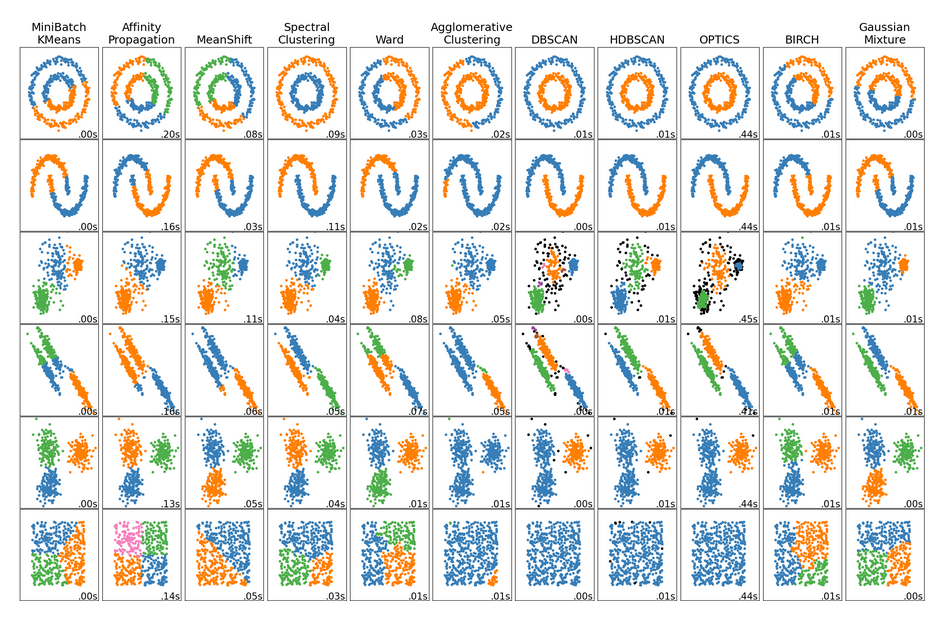

<center>
 Figure 3.1. A comparison of the clustering algorithms in scikit-learn.<br>
(Credit: <a href="https://scikit-learn.org/stable/modules/clustering.html"  target="_blank" rel="noopener noreferrer">Overview of clustering methods, scikit-learn API</a>)    
</center>


<div class="alert alert-warning" role="alert" style="border-radius: 8px; padding: 10px">

**Quiz Time**: take a few moments and explore the results - what do you notice? 
   
<details>

<b><summary>[Think a bit before clicking here...]</summary></b>  
<ul>
    <li> There is not a single best algorithm. 
    <li> Not all the algorithms identify the same number of clusters.
    <li> Some algorithms are better to detect arbitrary cluster shapes than others.
    <li> Some algorithms can be faster.
    <li> The intuitive clustering might not apply to very high dimensional data.
</ul>
</details>
</div>

In [ ]:
# EOF